<a href="https://colab.research.google.com/github/ibtihelgharsalah/Email-Sentiment-Analysis/blob/main/DLclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.analyticsvidhya.com/blog/2022/02/sentiment-analysis-with-nlp-deep-learning/

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        # For Plotting
import seaborn as sns                                  # For Plotting
from sklearn.metrics import log_loss                   # For Model Evaluation
from sklearn.model_selection import RepeatedKFold      # For Cross-Validation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ALL.xlsx.xlsx')
data

,Body,Label
0,Attached is a revised Credit Watch listing for...,neg
1,Continental has a price of $297.17(non-refunda...,pos
2,You hurt my feelings bc you didn't wait for my...,neg
3,Attached is the final notification report for ...,pos
4,The basic reason we are changing meters in Si...,pos
...,...,...
42624,"Thank you, I appreciate it.",pos
42625,Thanks Daryna â€“ you too!,pos
42626,Sorry Alex â€“ could you also explain why the ...,neg
42627,"Sergey, itâ€™s working.Â Thanks. Feel free to...",pos


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Email_Final.xlsx')
data

,Body,Label
0,Continental has a price of $297.17(non-refunda...,1
1,Attached is the final notification report for ...,1
2,The basic reason we are changing meters in Si...,1
3,We are going to try to get to the point of upl...,1
4,Please open the attachment and send me your in...,1
...,...,...
36777,"please join me on thursday, tuesday january 11...",0
36778,please see following details for concluding th...,0
36779,please see following details for current thurs...,0
36780,thanks for sending me your thoughts from the m...,0


In [ ]:
data.shape

(36782, 2)

([<matplotlib.patches.Wedge at 0x7f870e5c3290>,
 [Text(-0.15069374349207876, 1.0896290174515102, '1'),
  Text(0.15069364147364625, -1.089629031560472, '0')],
 [Text(-0.08219658735931568, 0.5943431004280965, '54.4%'),
  Text(0.08219653171289794, -0.5943431081238938, '45.6%')])

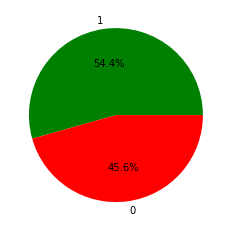

In [ ]:
sentiment_count = data.Label.value_counts()
sentiment_type = data.Label.value_counts().index
plt.pie(sentiment_count, labels=sentiment_type, autopct='%1.1f%%',colors=['green', 'red'])

In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]
label=[]

for i in range(len(data['Body'])):
  review = re.sub('[^a-zA-Z]', ' ', data['Body'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  label.append(data['Label'][i])
  corpus.append(review)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
stop_words = stopwords.words('english')
data['Body'] = data['Body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
data['Body']

0        Continental price $297.17(non-refundable) foll...
1        Attached final notification report January, 20...
2        The basic reason changing meters Sitara PGLC o...
3        We going try get point uploading nomination pe...
4        Please open attachment send info, ASAP, havent...
                               ...                        
36777    please join thursday, tuesday january 11 wedne...
36778    please see following details concluding thursd...
36779    please see following details current thursday'...
36780    thanks sending thoughts meeting attended. inte...
36781    thanks sending thoughts meeting attended. real...
Name: Body, Length: 36782, dtype: object

In [ ]:
X = data['Body']


In [ ]:
vectorizer = TfidfVectorizer(min_df=20,ngram_range=(1,4), max_features=250)
vectorizer.fit(X)
X = vectorizer.transform(X)  # Taking X as input and converting into feature matrix(numerical values)
X = X.todense()

In [ ]:
X

matrix([[0.        , 0.        , 0.10097937, ..., 0.        , 0.        ,
         0.07907075],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.54419898, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
for i in range(len(data)):
  if(data['Label'][i]==0):
    data['Label'][i]='neg'
  else:
    data['Label'][i]='pos'
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Body,Label
0,Continental price $297.17(non-refundable) foll...,pos
1,"Attached final notification report January, 20...",pos
2,The basic reason changing meters Sitara PGLC o...,pos
3,We going try get point uploading nomination pe...,pos
4,"Please open attachment send info, ASAP, havent...",pos
...,...,...
36777,"please join thursday, tuesday january 11 wedne...",neg
36778,please see following details concluding thursd...,neg
36779,please see following details current thursday'...,neg
36780,thanks sending thoughts meeting attended. inte...,neg


In [ ]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(data[['Label']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = data.join(encoder_df)
final_df.drop('Label', axis=1, inplace=True)
final_df.columns = ['Body', 'Neg', 'Pos']


In [ ]:
final_df

,Body,Neg,Pos
0,Continental price $297.17(non-refundable) foll...,0.0,1.0
1,"Attached final notification report January, 20...",0.0,1.0
2,The basic reason changing meters Sitara PGLC o...,0.0,1.0
3,We going try get point uploading nomination pe...,0.0,1.0
4,"Please open attachment send info, ASAP, havent...",0.0,1.0
...,...,...,...
36777,"please join thursday, tuesday january 11 wedne...",1.0,0.0
36778,please see following details concluding thursd...,1.0,0.0
36779,please see following details current thursday'...,1.0,0.0
36780,thanks sending thoughts meeting attended. inte...,1.0,0.0


In [ ]:
data['Label'] = pd.factorize(data['Label'])[0]
data

,Body,Label
0,Attached revised Credit Watch listing week 100...,0
1,Continental price $297.17(non-refundable) foll...,1
2,You hurt feelings bc wait call. Give call can. -d,0
3,"Attached final notification report January, 20...",1
4,The basic reason changing meters Sitara PGLC o...,1
...,...,...
42624,"Thank you, I appreciate it.",1
42625,Thanks Daryna â€“ too!,1
42626,Sorry Alex â€“ could also explain pricing incr...,0
42627,"Sergey, itâ€™s working.Â Thanks. Feel free clo...",1


In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [ ]:
y = np.array(final_df[['Neg','Pos']])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.initializers import RandomNormal

In [ ]:
def get_model(n_inputs, n_outputs):
  batch_size = 256  
  hidden_units = 3
  dropout = 0.2

  model = Sequential()
  model.add(Dense(hidden_units, input_dim=n_inputs,activation='relu',
          kernel_initializer='he_uniform'))
  model.add(Dropout(dropout))
  model.add(Dense(64,activation='relu',
          kernel_initializer='he_uniform'))
  model.add(Dropout(dropout))
  model.add(Dense(n_outputs))
  model.add(Activation('sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model

In [ ]:
import tensorflow as tf
def evaluate_model(X,y):
  results_test = []
  results_train =[]
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=0,min_delta = 0)
  n_inputs, n_outputs = X.shape[1], y.shape[1]
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  for train_ix,test_ix in cv.split(X):
    X_train, X_test = X[train_ix], X[test_ix]
    y_train,y_test = y[train_ix],y[test_ix]
    model = get_model(n_inputs, n_outputs)
    model.fit(X_train,y_train,verbose = 0, callbacks = callback)
    yhat_train = model.predict(X_train)
    yhat_test = model.predict(X_test)
    train_log_loss = log_loss(y_train, yhat_train)
    test_log_loss = log_loss(y_test,yhat_test)
    results_train.append(train_log_loss)
    results_test.append(test_log_loss)
    model.save_weights("/content/drive/MyDrive/model.h5")
  return results_train,results_test,model

Saved model to disk


In [ ]:
results_train,results_test,model = evaluate_model(X, y)
print(results_train)
print(results_test)

[0.42204966879226274, 0.4250070739633865, 0.4261291428625113, 0.4463835963557312, 0.42056575416898323, 0.41922756841024716, 0.4348573937288593, 0.4495161109821278, 0.41970861982921337, 0.43595692696493255, 0.4230454226331188, 0.4183183019508737, 0.4221689877210734, 0.42559648114117865, 0.4424007752817881, 0.4370210854854981, 0.42234488312857793, 0.45694215339787136, 0.42503815999536704, 0.45672190168206084, 0.4254264183056558, 0.422160122287271, 0.4169580253313588, 0.42090840935850166, 0.4267999851471758, 0.4491502061251641, 0.4246588349706346, 0.42603235483125834, 0.42046669470931425, 0.43281794638367077]
[0.4317401177547295, 0.4283346930683544, 0.42379335095156884, 0.4445208423076081, 0.43295795421167393, 0.42630382310117504, 0.4322096867947811, 0.46533003145627033, 0.43671202934395204, 0.44415948708611414, 0.4449728071616763, 0.421580190192545, 0.4279937143355784, 0.4316025248451676, 0.44104280190593237, 0.44069414211115776, 0.43592096987746776, 0.46070488956551786, 0.43442957598020

In [ ]:
print(sum(results_train)/len(results_train))
print(sum(results_test)/len(results_test))

0.41999497029804017
0.4275518179392268


In [ ]:
from tensorflow.keras.models import Model

In [ ]:
test_data = pd.read_excel("/content/drive/MyDrive/test.xlsx")
test_data

,Body,Label
0,Take some time to consider the offer - you can...,NaN
1,Follow up with a job offer acceptance email / ...,NaN
2,Find out the process of handing in your notice...,NaN
3,I know you have many responsibilities to take ...,NaN
4,I love your creativity. The minimal and abstra...,NaN
5,"Because of this, I am sorry to say that I will...",NaN
6,"would, again, like to express my gratitude for...",NaN
7,"It was a difficult decision, but I will not be...",NaN
8,Find out the process of handing in your notice...,NaN
9,I enjoyed your presentation and the insight yo...,NaN


In [ ]:
stop_words = stopwords.words('english')
test_data['Body'] = test_data['Body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
X_test = test_data['Body']
X_test

0    Take time consider offer - accept job offer ve...
1    Follow job offer acceptance email / confirmati...
2    Find process handing notice Make sure details ...
3    I know many responsibilities take care yoursel...
4    I love creativity. The minimal abstract aesthe...
5    Because this, I sorry say I decline generous o...
6    would, again, like express gratitude offer reg...
7         It difficult decision, I accepting position.
8    Find process handing notice Make sure details ...
9    I enjoyed presentation insight provided. I’ve ...
Name: Body, dtype: object

In [ ]:
test_vectorised_data = vectorizer.transform (X_test)
test_vectorised_data = test_vectorised_data.todense()

In [ ]:
prediction_on_test_data = model.predict(test_vectorised_data)

In [ ]:
df_test = pd.DataFrame(prediction_on_test_data, columns = ['Neg','Pos'])

In [ ]:
df_test

,Neg,Pos
0,0.146200,0.860279
1,0.777477,0.227471
2,0.699077,0.295058
3,0.608445,0.385868
4,0.285745,0.707699
5,0.989847,0.011310
6,0.032543,0.972234
7,0.608084,0.402749
8,0.808653,0.190796
9,0.596459,0.400894


In [ ]:
df_test

,Neg,Pos
0,0.223654,0.772408
1,0.745505,0.251539
2,0.620868,0.389636
3,0.547699,0.449791
4,0.471177,0.525289
5,0.962501,0.033736
6,0.007816,0.992839
7,0.605830,0.387370
8,0.836552,0.162445
9,0.477467,0.526207


In [ ]:
from collections import Counter

def Result(df):
  results=[]
  for i in range(len(df)):
    if(df['Neg'][i]>0.83):
      results.append(0)
    elif (df['Neg'][i]<0.45):
      results.append(1)
    else:
      results.append(2)
  count_dict = dict(Counter(results).items())
  x=(count_dict[1]/(len(results)-count_dict[2]))*100
  print(count_dict)
  print(len(results))
  print(results)
  print(x)


In [ ]:
Result(df_test)

{1: 3, 2: 6, 0: 1}
10
[1, 2, 2, 2, 1, 0, 1, 2, 2, 2]
75.0
